# IDS 575 - Assignment 3

## Q.1) Probabilistic Perspective of Linear Regression 

**Your goal is to relate the likelihood maximization objective to the least squares objective.**

$$ y=\theta_0+\theta_1 x_1+\theta_2 x_2+\theta_3 x_1^2+\epsilon \textrm{ where } \epsilon\sim N(0,\sigma^2) $$

**1. Is y linear with respect to $\theta$? Is  linear with respect to $ \{x_1,x_2\} $**

**_Y is Linear with respect to theta as if all $\{x_1,x_2\}$ are kept constant the Y varies linearly w.r.t $\theta$.<br> However, Y is not linear with respect to $\{x_1,x_2\}$ following similar argument._**

**2.**

![Q1.%202._1.jpg](attachment:Q1.%202._1.jpg)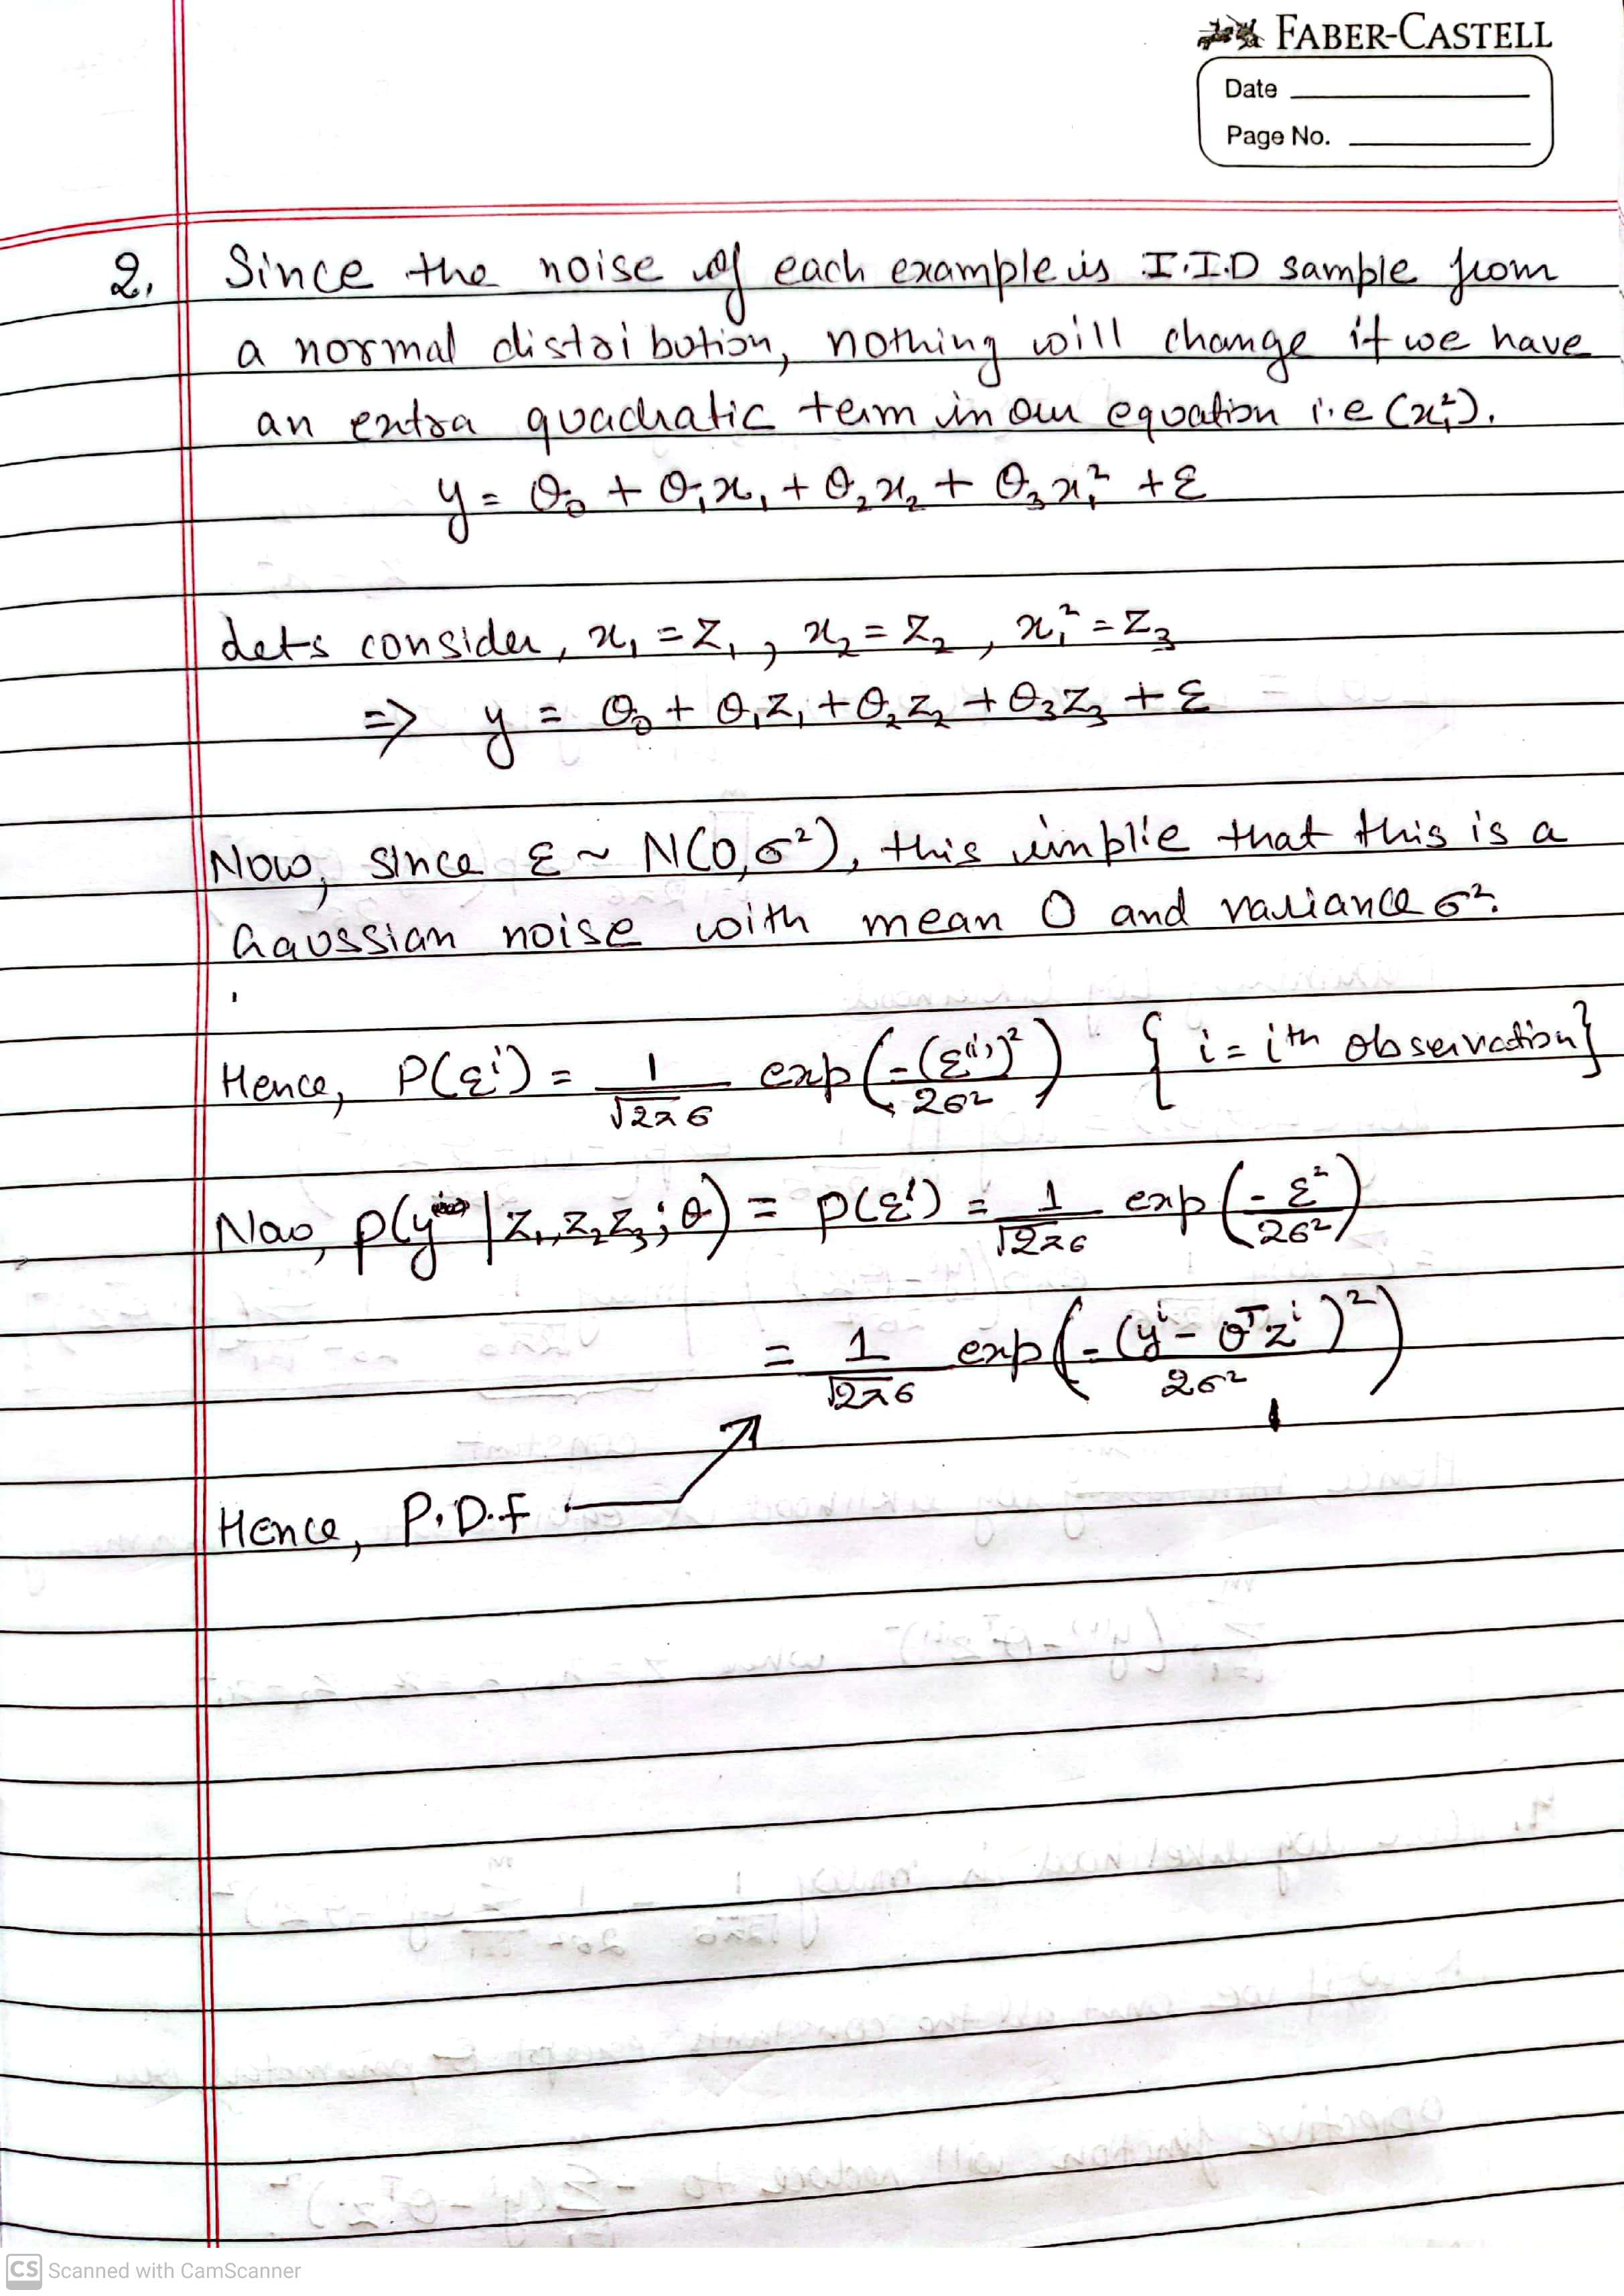

**3.**

![Q1.%203_1.jpg](attachment:Q1.%203_1.jpg)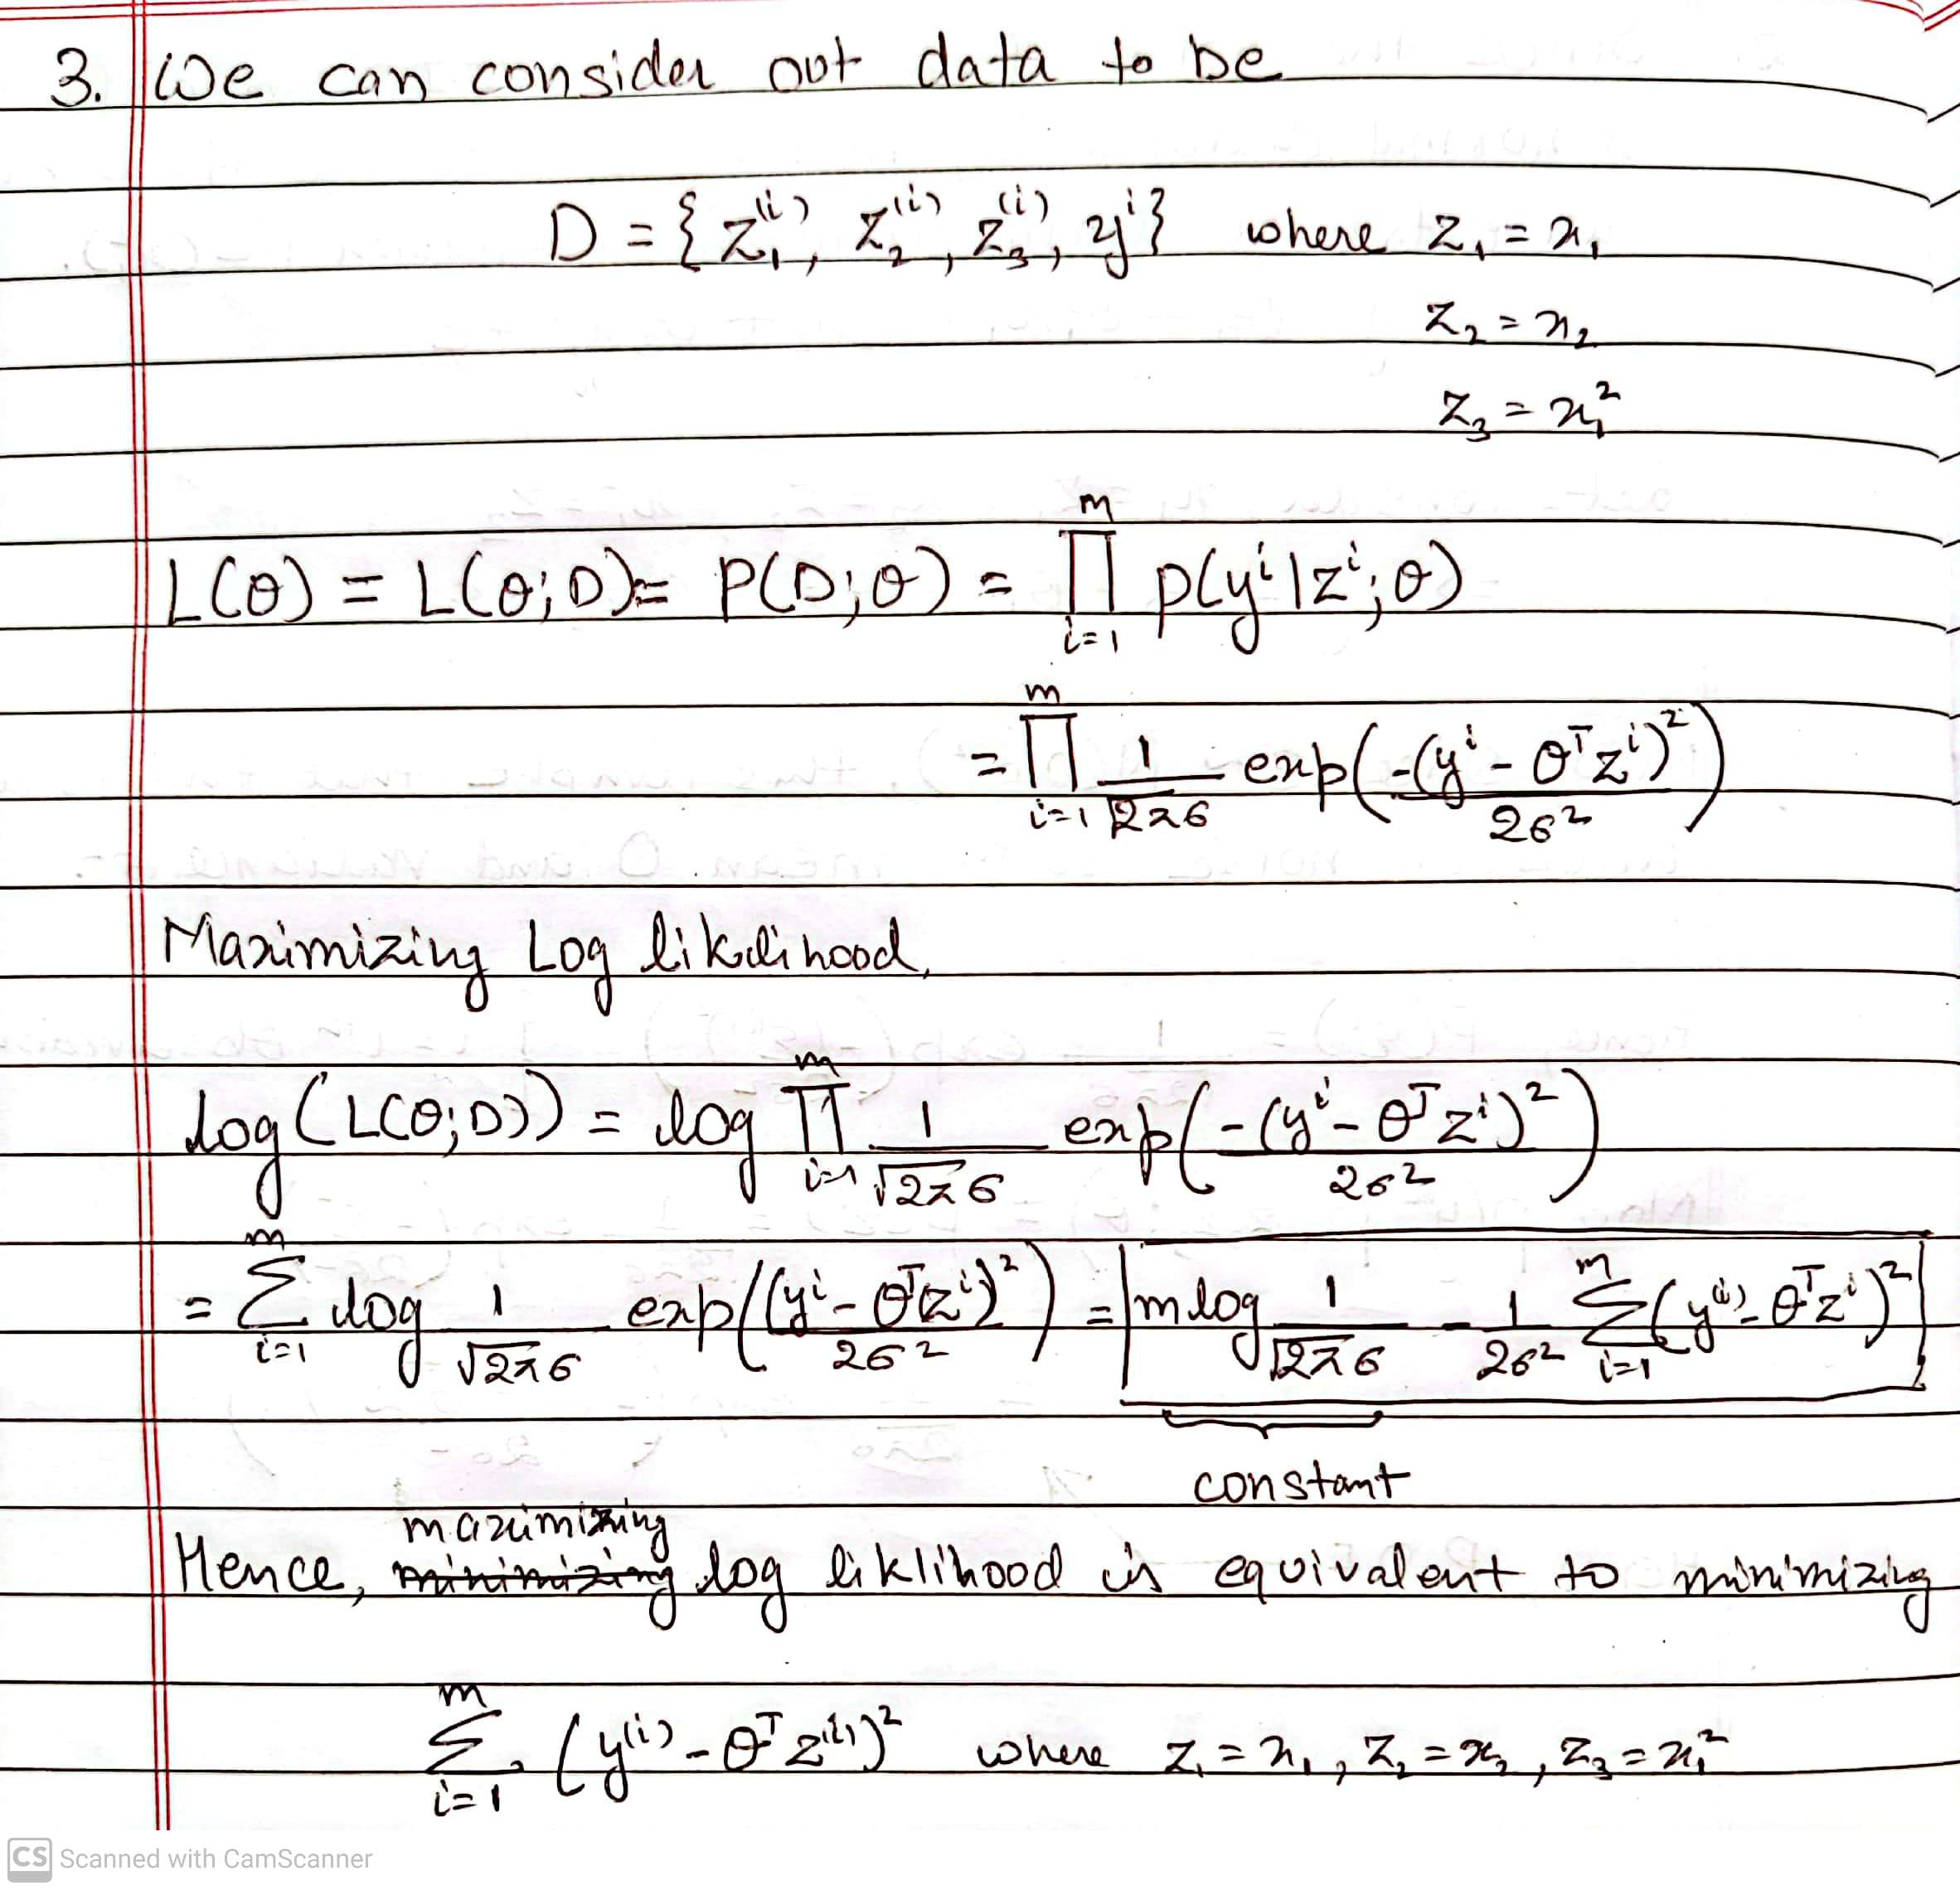

**4.**

![Q1.%204_1.jpg](attachment:Q1.%204_1.jpg)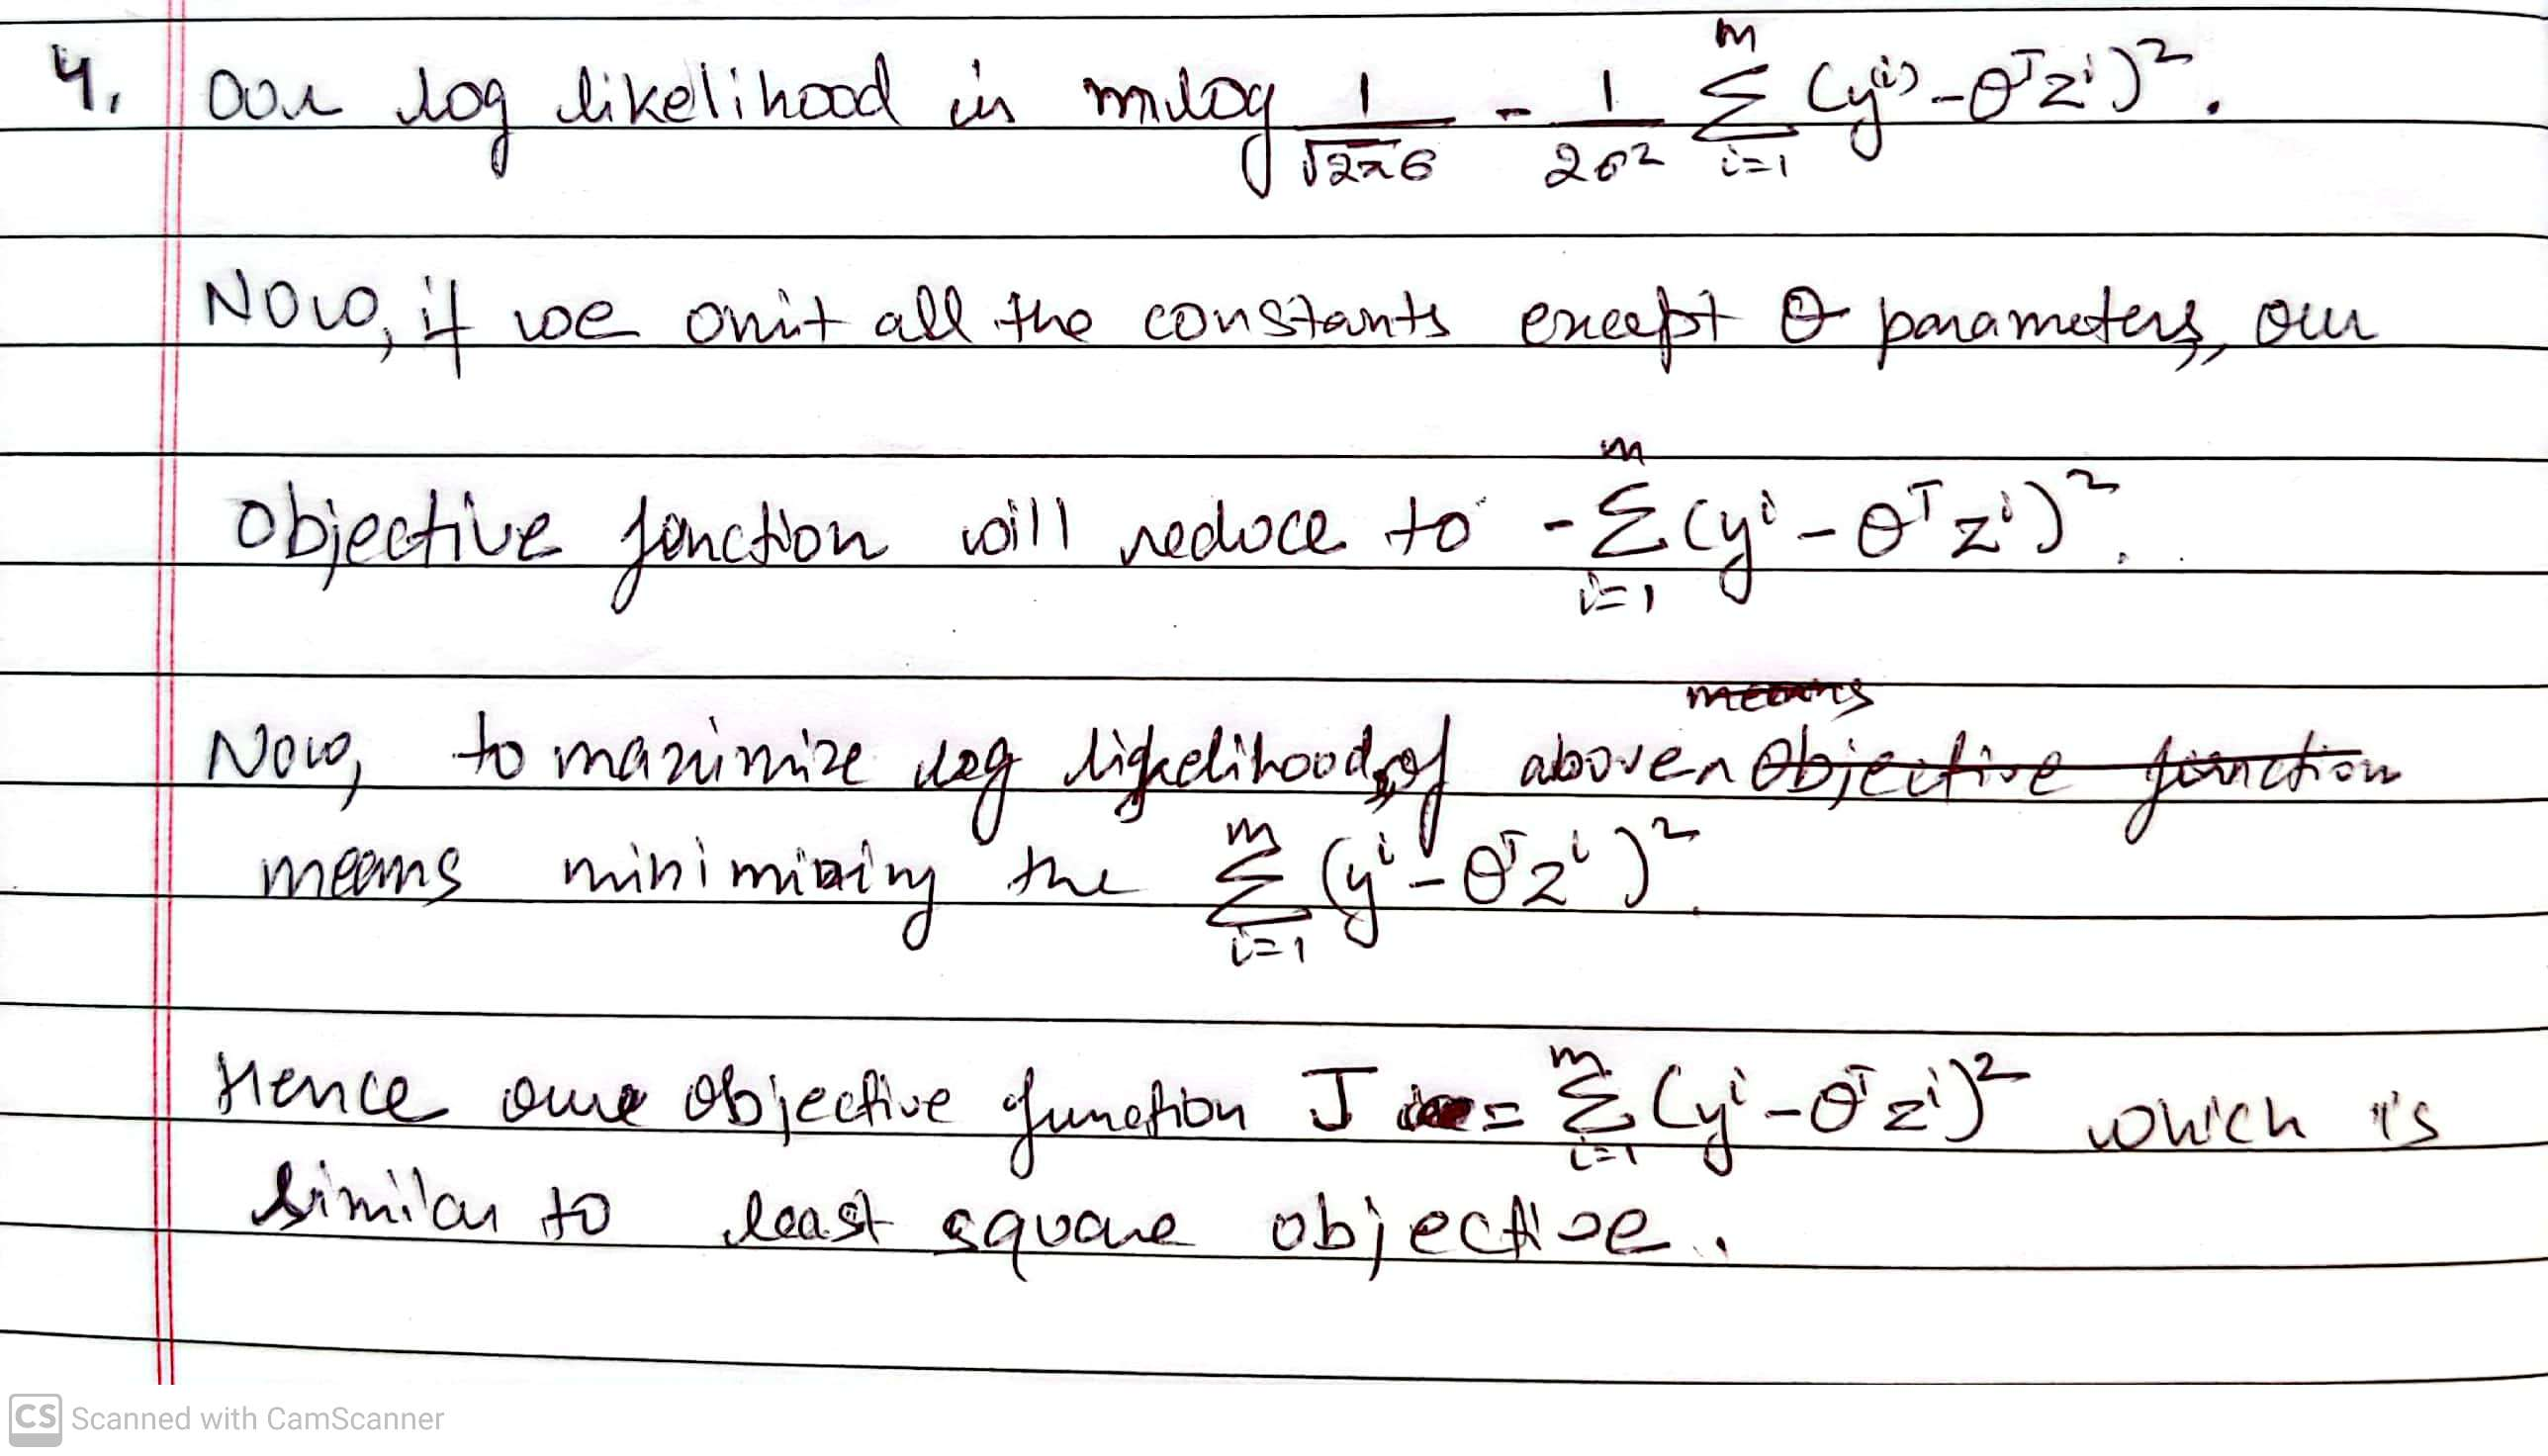

## 2.) Logistic Regression Toy Problem 

#### 2.1) Define a python function, which given inputs X1,X2,θ will return the probability of passing the class.

In [ ]:
import math 
def Function(X1, X2):
    #Where X1= hours studied which is 40
    #Where X2= Undergrad GPA whoch is 3.5
    #Formula = Y = q0 + (q1*X1)+(q2*X2)
    #Where given that q0 = -6 , q1 = 0.05, q2 = 1 
    probability = (-6 + (0.05*X1)+(1*X2))
    p = (-100*probability)
    e=2.718
    probability_logged = (e**probability)/(1+(e**probability))
    Prob = probability_logged
    print ("The Probablility is", Prob)
    print ("The number of hours is", p)
    return
    


In [ ]:
Function(40,3.5)

The Probablility is 0.37755285196978483
The number of hours is 50.0


#### 2.2) What will be the probability of passing the class for a student who studies for 40 hours and has a GPA of 3.5?

## Ans.) Probabilty of the student who studies for 40 hours and has a GPA of 3.5 passing the class is ***37.73%.***

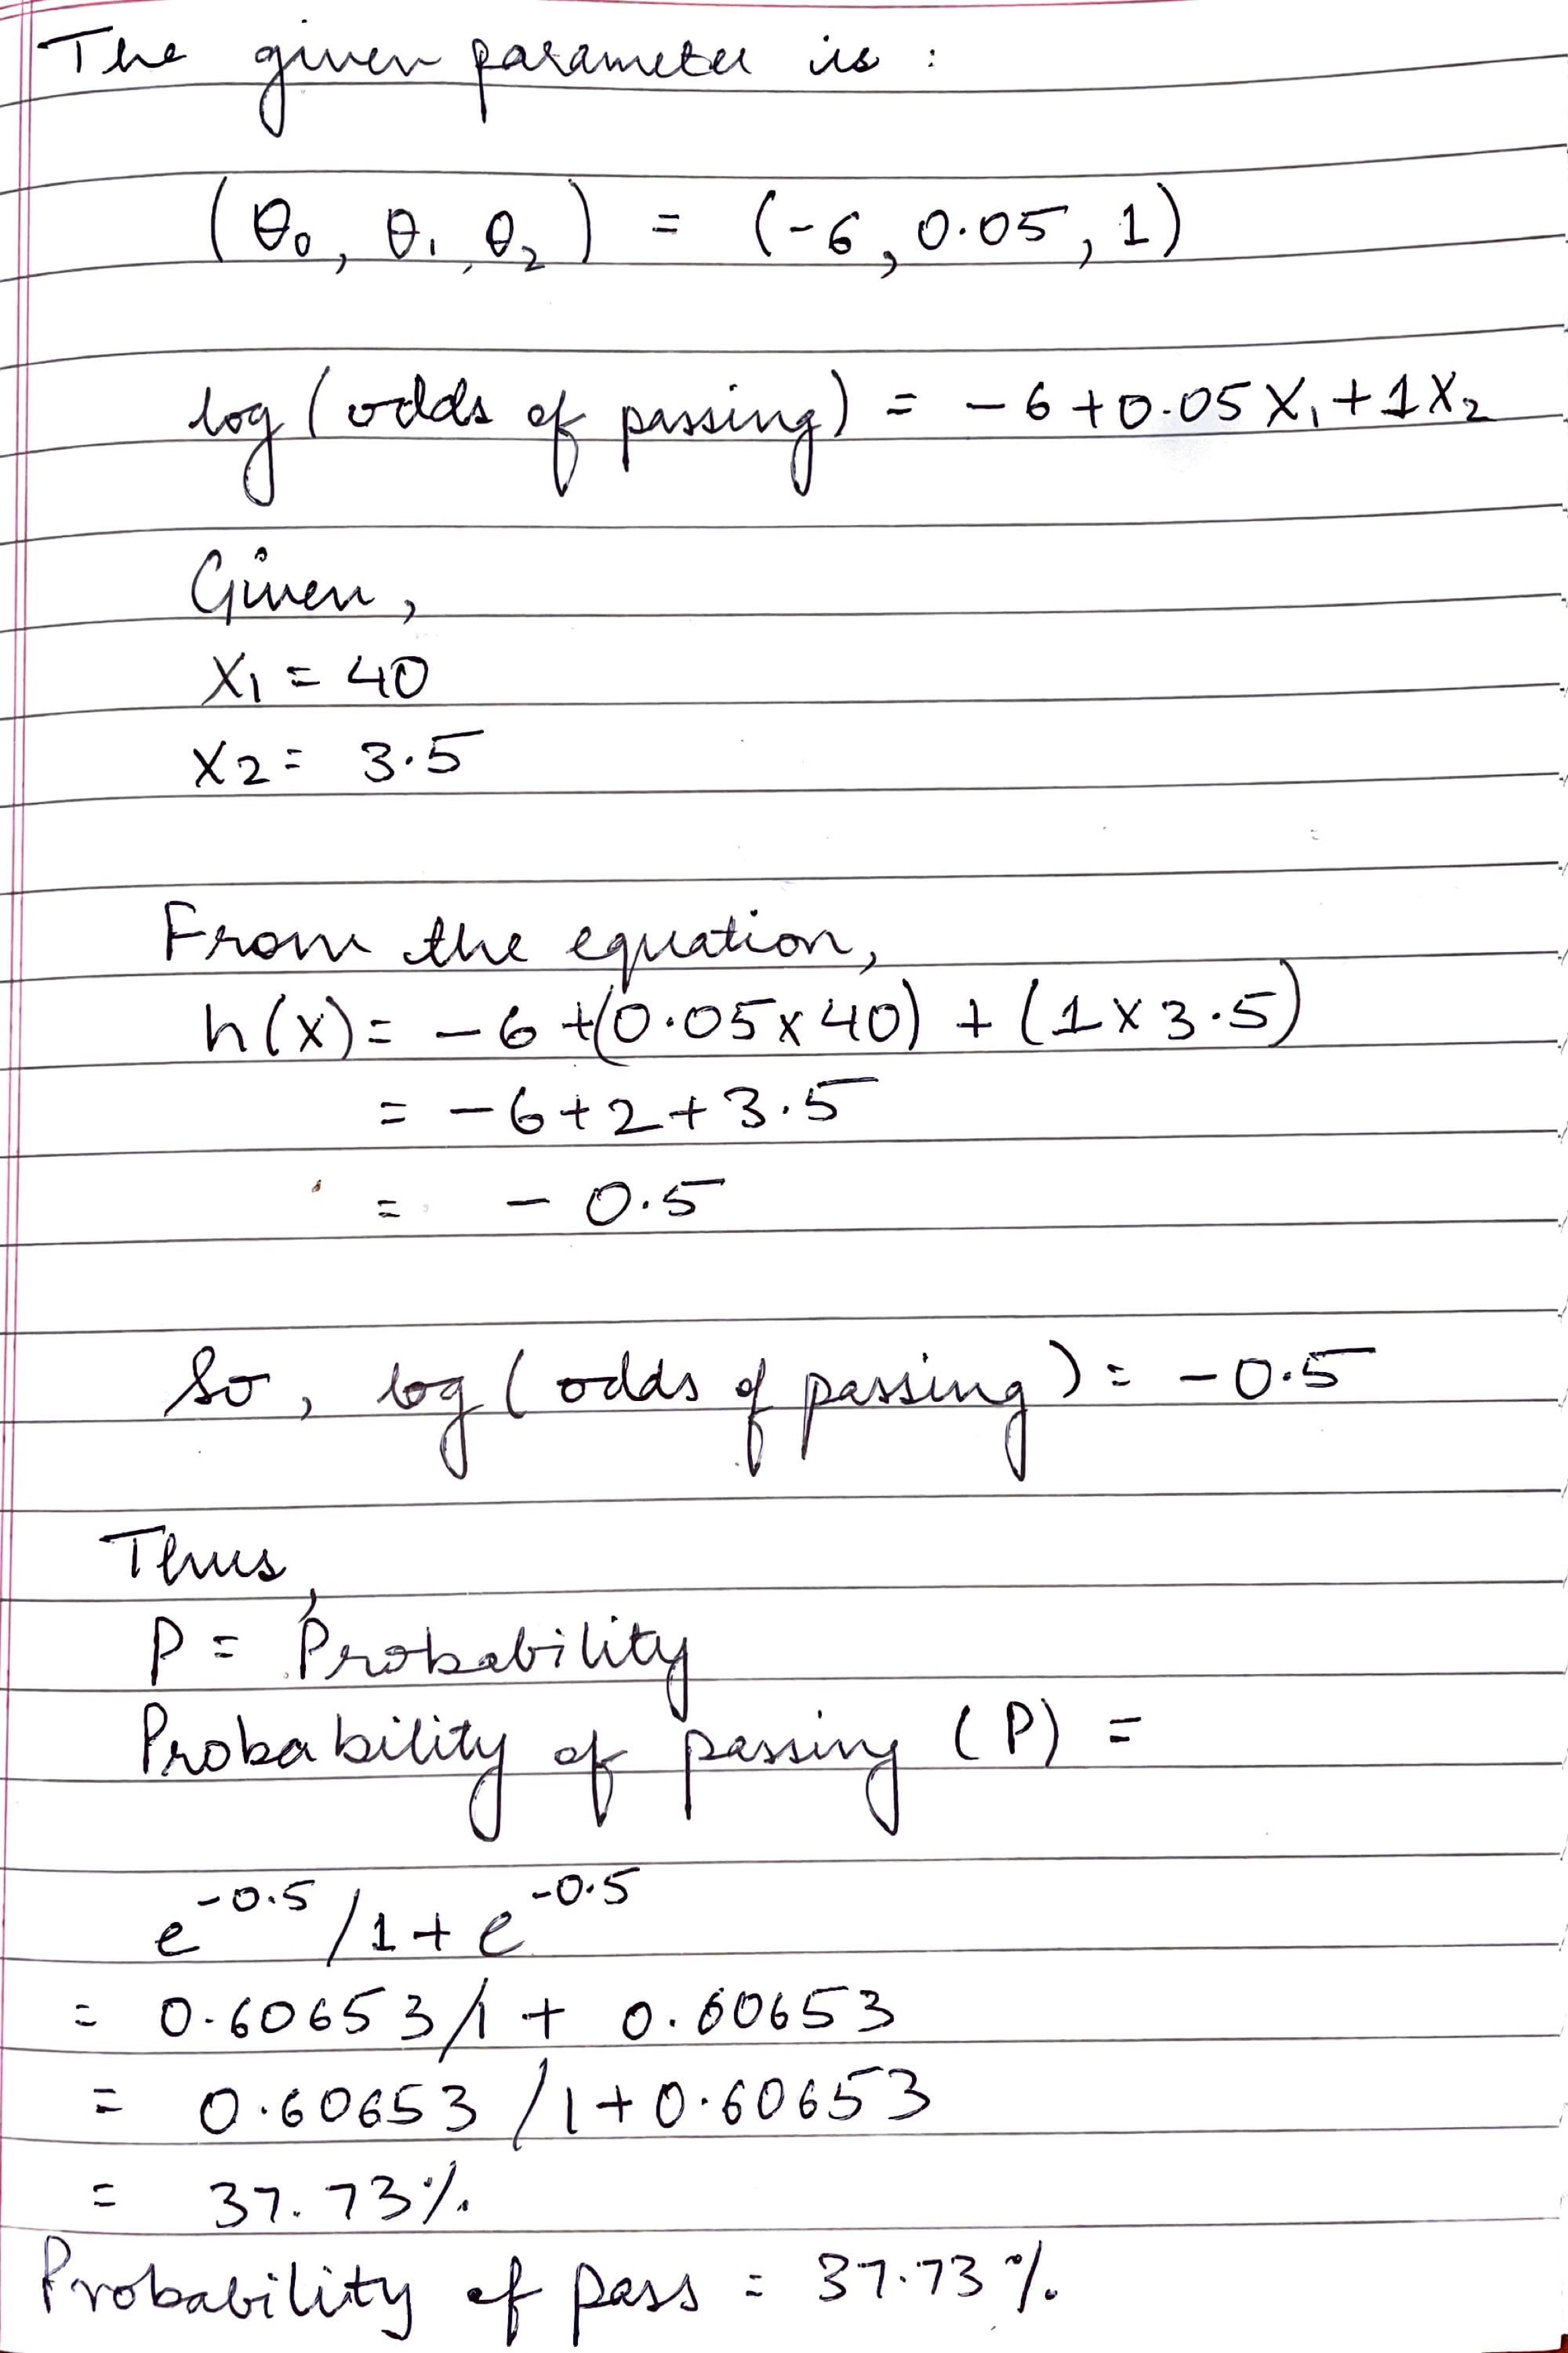

#### 2.3) How many hours would the aforementioned student need to study in order to have at least 50% chance of passing the class?

## Ans.) For the aforementioned student to have atleast a 50% chance of passing the class the student would need to study for ***50 hours***

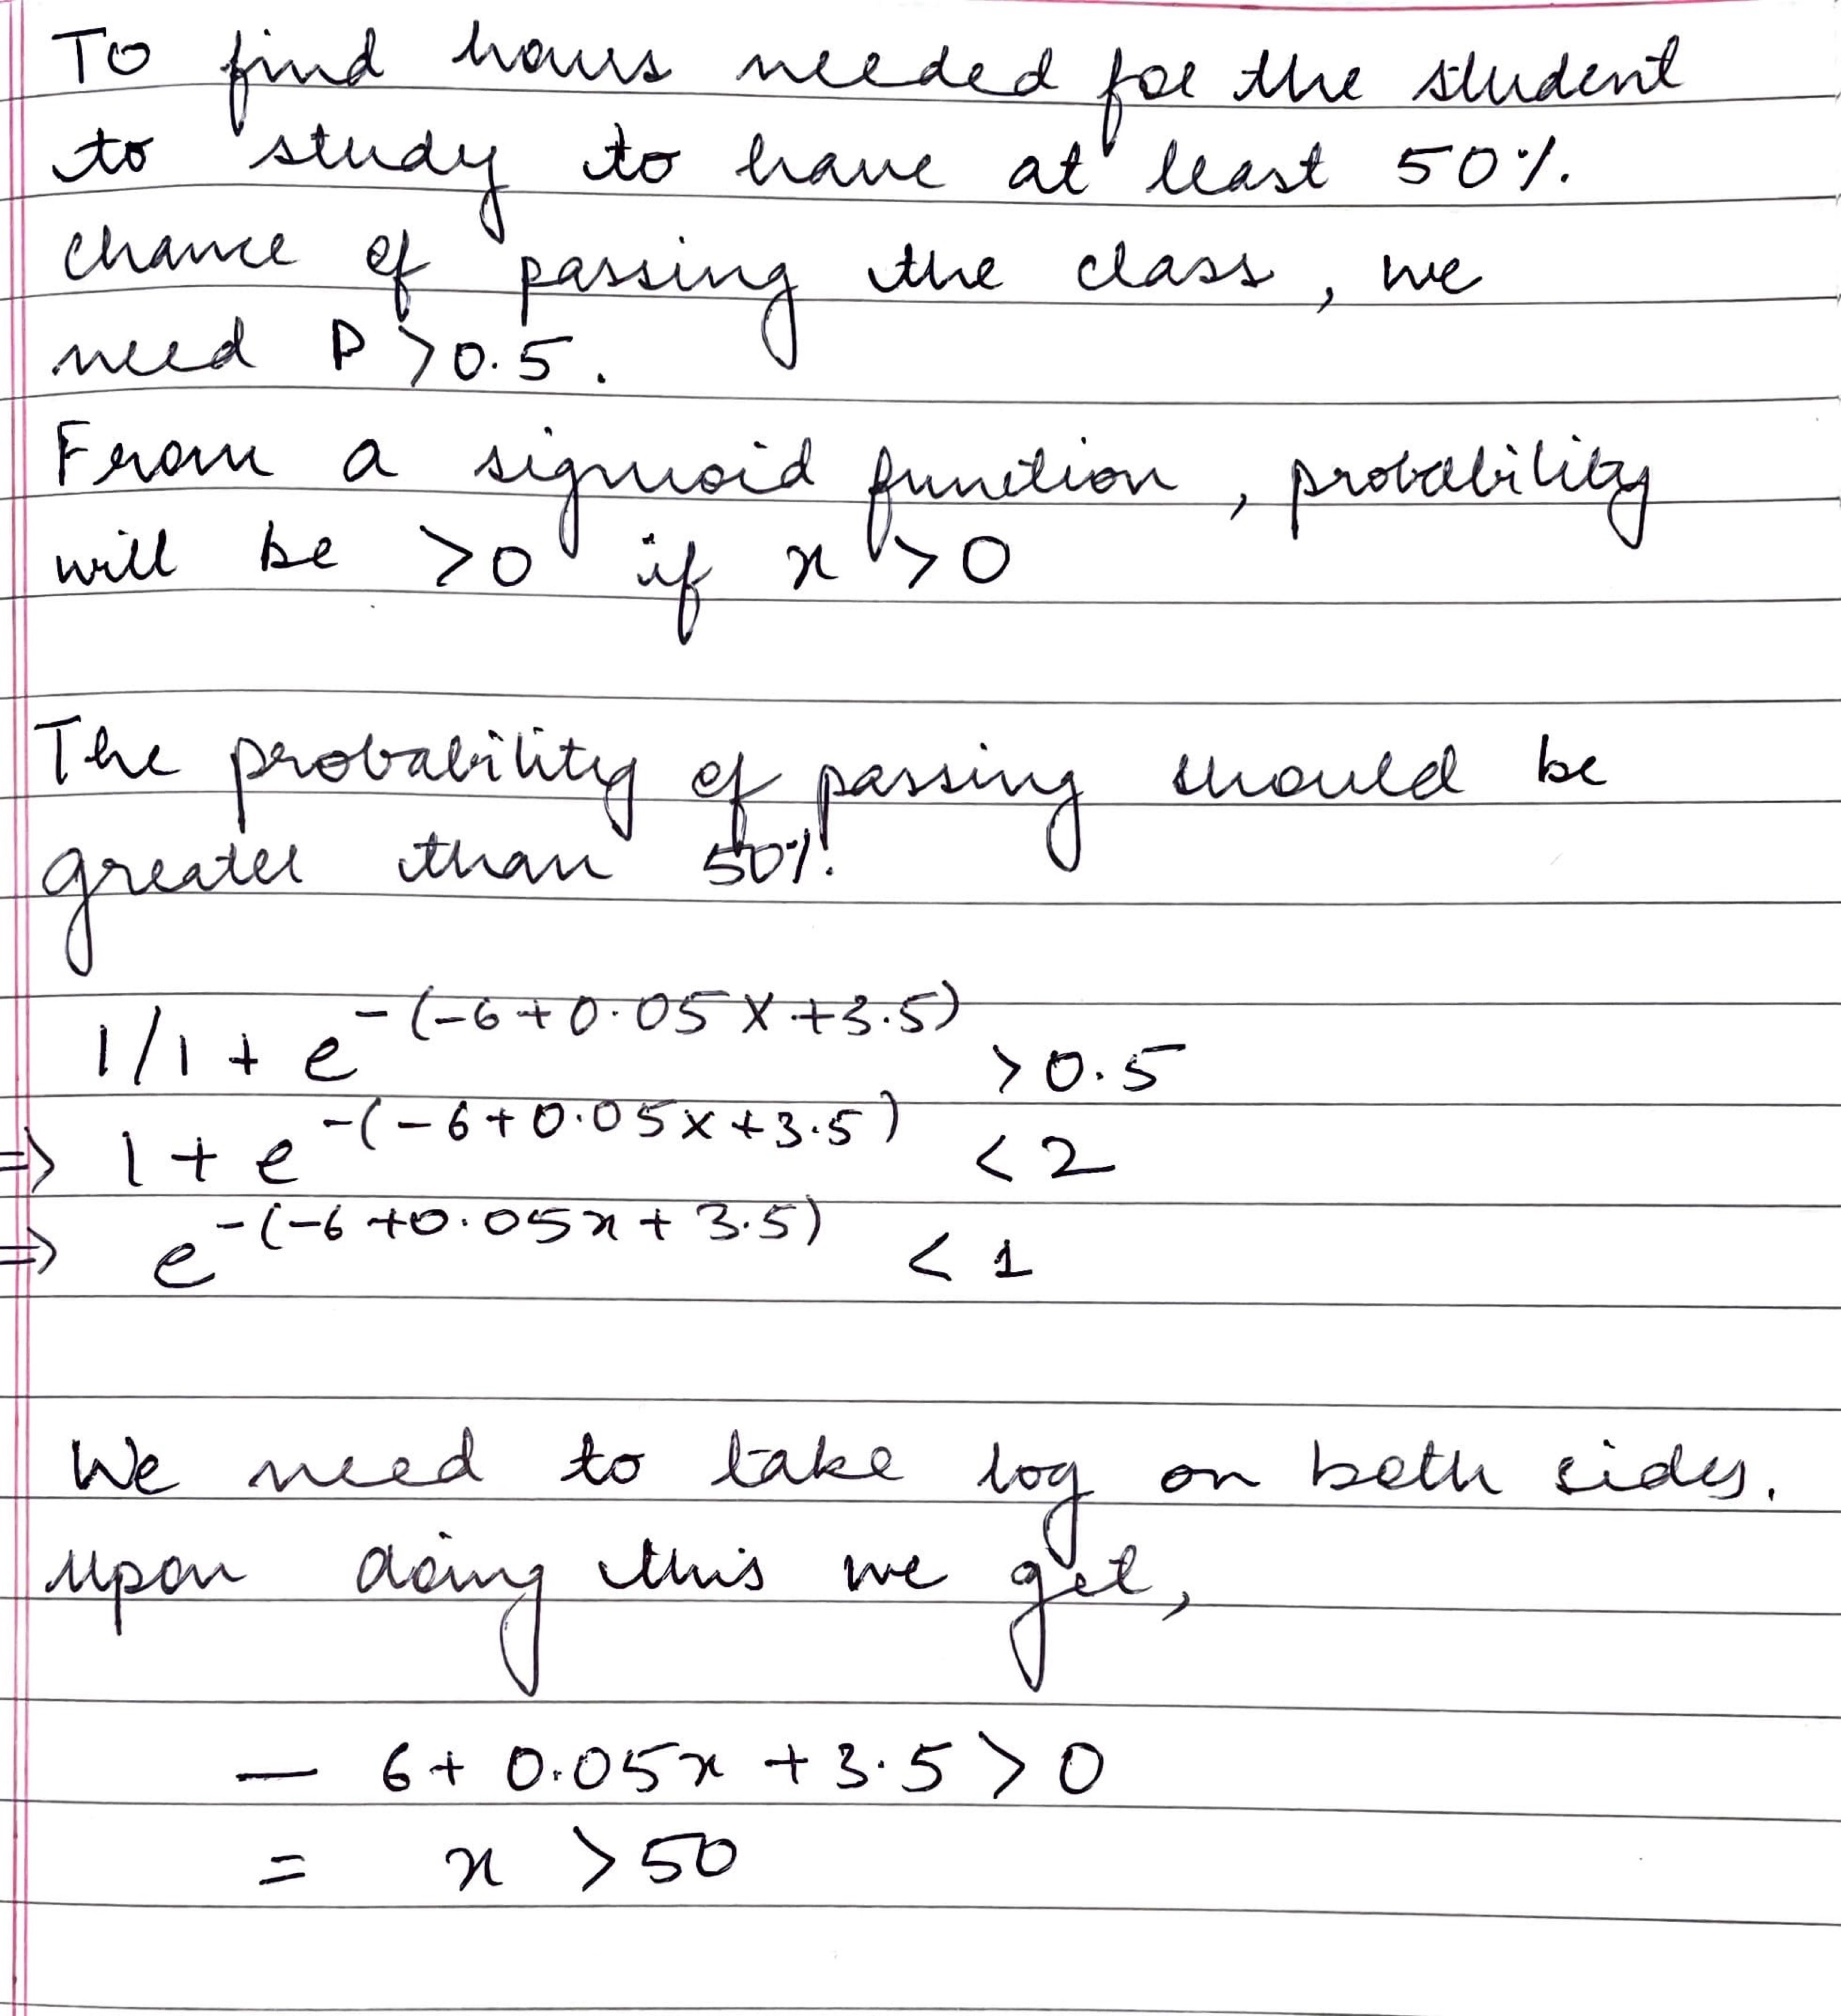

## Question 3 - Logistic Regression


#### Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### 3.1. In the data, the input features are five of Lag variables and Volume, and the binary output is Direction. Read the csv into a pandas dataframe and describe the relevant features and target variables of the dataset.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Weekly.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1089 non-null   int64  
 1   Year        1089 non-null   int64  
 2   Lag1        1089 non-null   float64
 3   Lag2        1089 non-null   float64
 4   Lag3        1089 non-null   float64
 5   Lag4        1089 non-null   float64
 6   Lag5        1089 non-null   float64
 7   Volume      1089 non-null   float64
 8   Today       1089 non-null   float64
 9   Direction   1089 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 85.2+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,545.000000,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,314.511526,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1.000000,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,273.000000,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,545.000000,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,817.000000,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,1089.000000,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [ ]:
df['Direction'].value_counts()

Up      605
Down    484
Name: Direction, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


**_1. There are a total of 1089 records in the dataset having 9 different variables. All the 9 variables are continuous. <br> 2. Of these 9 variables, the variable 'Unnamed: 0' is the index of the dataframe. The variable 'Year' has values from 1990 till 2010. The above table shows few statistics of the 7 relevant features of our dataset showing their mean, std, min, max, etc.  <br>3. Apart from these 9, our target variable is 'Direction' which is binary having two values 'Up' (605 records) and 'Down' (484 records)._**

### 3.2. We plan to reuse the SGD procedure from Assignment 2 to fit a logistic regression model. Do we need to write a new gradient function tailored to binary logistic regression, or can we use the one written in Assignment 2?

**_We can use the same SGD procedure from Assignment 2. However, since the target variable of our new dataset is categorical with two classes, we need to use a different loss function, the logistic loss/cross-entropy loss function. Then we can use the previously implmented SGD with newly implemented logistic loss gradient function._**

### 3.3. Extend the gradient function such that a regularized logistic loss is being minimized. In particular, consider an L2 penalty on the parameters (except the intercept). For this, the gradient function will need: (a) a penalty input that can take two values: "none" and "l2", and (b) an optional regularization coefficient C input. Summarize the changes from the previously written gradient function that were necessary to accomplish this.

In [ ]:
def ce_loss(theta,X,y):
    m=len(y)
    predictions = 1/(1+(np.exp(-X.dot(theta))))
    return np.sum((y*np.log(predictions))+((1-y)*np.log(1-predictions)))

def test_loss(theta,X,y):
    m=len(y)
    rand_ind = np.random.randint(0, m)
    Xt_i = X[rand_ind, :].reshape(1, X.shape[1])
    yt_i = y[rand_ind].reshape(1, 1)
    predictions = 1/(1+(np.exp(-Xt_i.dot(theta))))
    return np.sum((yt_i*np.log(predictions))+((1-yt_i)*np.log(1-predictions)))


def logloss_gradient(theta,X,y,C,lamda=None):
    m=len(y)
    predictions = 1/(1+(np.exp(-X.dot(theta))))
    theta[0] = 0
    if lamda == "l2":
        return (1/m)*np.dot(((predictions-y).T),X) + (((C/m)*theta).T)
    else:
        return (1/m)*np.dot(((predictions-y).T),X)

def stocashtic_gradient_descent(X, y, X_test, y_test, theta, learning_rate, iterations, lamda,C):
    m = len(y)
    cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost = 0.0
        test_cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            # Xt_i = X_test[rand_ind, :].reshape(1, X_test.shape[1])
            # yt_i = y_test[rand_ind].reshape(1, 1)
            theta = theta - learning_rate * ((logloss_gradient(theta,X_i,y_i,C,lamda)).T)
            cost += ce_loss(theta, X_i, y_i)
            test_cost += test_loss(theta, X_test, y_test)        
        cost_history[it] = cost
        test_cost_history[it] = test_cost
    return theta,cost_history, test_cost_history


**_For the previously written gradient function, the gradient was calculated on ordinary least square (OLS). The previously written gradient function calculates the prediction with just the dot product of X and theta.<br> Howvever, for the new gradient function, the loss is calculated on a regularised loss. The predictions are calculated using sigmoid fuction over the dot product of X and theta._**

### 3.4. Write a python function that takes the predicted labels and the true label arrays, and computes the confusion matrix.

In [ ]:
def confusion_matrix(p_label,t_label):
    m = len(t_label)
    TP = np.sum(p_label[np.array(np.where(t_label==1))[0]] == 1)
    TN = np.sum(p_label[np.array(np.where(t_label==0))[0]] == 0)
    FP = np.sum(p_label[np.array(np.where(t_label==0))[0]] == 1)
    FN = np.sum(p_label[np.array(np.where(t_label==1))[0]] == 0)
    return np.array([[TP,TN], [FP,FN]])

In [ ]:
def accuracy_calc(predicted_label, true_label):
  return np.sum(predicted_label == true_label)/len(true_label)

In [ ]:
acc_df=pd.DataFrame(columns=['Model', 'Accuracy']) #Dataframe to store the model name and the corresponding accuracy

### 3.5 Use the above function to report the confusion matrix and the accuracy on both training and test data for two models: <br>
**3.5.A. The learned model when the regularization is absent <br>
3.5.B. The learned model when regularization is present. (Hint: As nothing is specified, your default threshold to decide Up/Down can be 0.5.)**

#### Split the dataset into train and test

In [ ]:
df['Direction_n'] = np.where(df['Direction'] == 'Up', 1, 0)
train_data = df[df['Year'] < 2009]
test_data = df[df['Year'] > 2008]
X_train = train_data.loc[:,['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_train = train_data.loc[:,['Direction_n']]
X_test = test_data.loc[:,['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_test = test_data.loc[:,['Direction_n']]

**3.5.A. Logistic model when the regularization is absent**

In [ ]:
lr = 0.0001
n_iter = 1000
theta = np.random.randn(7, 1)
X_b = np.c_[np.ones((len(X_train),1)),X_train]
y_b = np.array(y_train)
X_t = np.c_[np.ones((len(X_test),1)),X_test]
y_t = np.array(y_test)
theta_l,cost_history_woR, test_cost_history_woR = stocashtic_gradient_descent(X_b,y_b,X_t, y_t,theta,lr,n_iter,None,0)
print("Theta0: {:0.3f},\nTheta1:{:0.3f},\nTheta2:{:0.3f},\nTheta3:{:0.3f},\nTheta4:{:0.3f},\nTheta5:{:0.3f},\nTheta6:{:0.3f}".format(theta[0][0], theta[1][0], theta[2][0], theta[3][0], theta[4][0], theta[5][0], theta[6][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history_woR[-1]))

Theta0: 0.000,
Theta1:1.221,
Theta2:-0.128,
Theta3:-1.026,
Theta4:-0.378,
Theta5:-0.344,
Theta6:0.301
Final cost/MSE:  -676.738


In [ ]:
print("Final cost/MSE:  {:0.3f}".format(test_cost_history_woR[-1]))

Final cost/MSE:  -674.395


**Accuracy and Confusion Matrix for Model Evaluation on Training Data**

In [ ]:
X_t = np.c_[np.ones((len(X_train),1)),X_train]
true_label = np.array(y_train)
predict = np.dot(X_t,theta_l)
predicted_label = np.where(predict >=0.5, 1, 0)
print("Accuracy on Training Data is: ", accuracy_calc(predicted_label, true_label))
acc_df.loc[0]=("Without regularization (train data)", accuracy_calc(predicted_label, true_label)*100)
conf_matrix_reg_abs_train=confusion_matrix(predicted_label,true_label)
print("Confusion Matrix is: ",conf_matrix_reg_abs_train)

Accuracy on Training Data is:  0.45380710659898477
Confusion Matrix is:  [[ 12 435]
 [  6 532]]


**Accuracy and Confusion Matrix for Model Evaluation on Test Data**

In [ ]:
X_t = np.c_[np.ones((len(X_test),1)),X_test]
true_label = np.array(y_test)
predict = np.dot(X_t,theta_l)
predicted_label = np.where(predict >=0.5, 1, 0)
resid=y_test-predict
print("Accuracy on Training Data is: ", accuracy_calc(predicted_label, true_label))
acc_df.loc[1]=("Without regularization (test data)", accuracy_calc(predicted_label, true_label)*100)
conf_matrix_reg_abs_test=confusion_matrix(predicted_label,true_label)
print("Confusion Matrix is: ",conf_matrix_reg_abs_test)

Accuracy on Training Data is:  0.4519230769230769
Confusion Matrix is:  [[ 9 38]
 [ 5 52]]


**3.5.B. Logistic model when the regularization is Present**

In [ ]:
lr = 0.0001
n_iter = 1000
theta = np.random.randn(7, 1)
X_b = np.c_[np.ones((len(X_train),1)),X_train]
y_b = np.array(y_train)
X_t = np.c_[np.ones((len(X_test),1)),X_test]
y_t = np.array(y_test)
theta_l,cost_history_wR, test_cost_history_wR = stocashtic_gradient_descent(X_b,y_b,X_t, y_t,theta,lr,n_iter,'l2',0.001)
print("Theta0: {:0.3f},\nTheta1:{:0.3f},\nTheta2:{:0.3f},\nTheta3:{:0.3f},\nTheta4:{:0.3f},\nTheta5:{:0.3f},\nTheta6:{:0.3f}".format(theta[0][0], theta[1][0], theta[2][0], theta[3][0], theta[4][0], theta[5][0], theta[6][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history_wR[-1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Theta0: 0.000,
Theta1:-0.092,
Theta2:-0.971,
Theta3:0.345,
Theta4:-1.711,
Theta5:0.503,
Theta6:1.018
Final cost/MSE:  -671.294


**Accuracy and Confusion Matrix for Model Evaluation on Training Data**

In [ ]:
X_t = np.c_[np.ones((len(X_train),1)),X_train]
true_label = np.array(y_train)
predict = np.dot(X_t,theta_l)
predicted_label = np.where(predict >=0.5, 1, 0)
print("Accuracy on Training Data is: ", accuracy_calc(predicted_label, true_label))
acc_df.loc[2]=("With regularization (train data)", accuracy_calc(predicted_label, true_label)*100)
conf_matrix_reg_pre_train=confusion_matrix(predicted_label,true_label)
print("Confusion Matrix is: ",conf_matrix_reg_pre_train)

Accuracy on Training Data is:  0.45685279187817257
Confusion Matrix is:  [[ 19 431]
 [ 10 525]]


**Accuracy and Confusion Matrix for Model Evaluation on Test Data**

In [ ]:
X_t = np.c_[np.ones((len(X_test),1)),X_test]
true_label = np.array(y_test)
predict = np.dot(X_t,theta_l)
predicted_label = np.where(predict >=0.5, 1, 0)
print("Accuracy on Training Data is: ", accuracy_calc(predicted_label, true_label))
acc_df.loc[3]=("With regularization (test data)", accuracy_calc(predicted_label, true_label)*100)
conf_matrix_reg_pre_test=confusion_matrix(predicted_label,true_label)
print("Confusion Matrix is: ",conf_matrix_reg_pre_test)

Accuracy on Training Data is:  0.4807692307692308
Confusion Matrix is:  [[13 37]
 [ 6 48]]


### 3.6 Also plot the two losses (training and test) as a function of epoch for each model

#### Model Without Regularizer

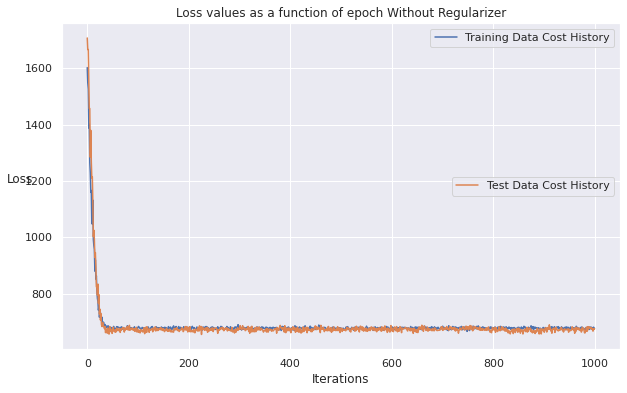

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel("Loss", rotation=0)
ax.set_xlabel("Iterations")
plt.title(label="Loss values as a function of epoch Without Regularizer")

ctrain,=plt.plot(range(n_iter), -cost_history_woR, label="Training Data Cost History")
ctest,=plt.plot(range(n_iter), -test_cost_history_woR, label="Test Data Cost History")

l1 = ax.legend(handles=[ctrain], loc='upper right')
l2 = ax.legend(handles=[ctest], loc='center right')

ax.add_artist(l1)

plt.show()

##### 3.6.A Are we overfitting in comparison to the test loss? Why/why not? (for Without Regularizer)

We are not overfitting in comparison to the test loss as the loss values for the test data are higher and the test loss is also similar to the training loss.

##### 3.6.B Is the model without the regularization overfitting?


We are not overfitting in comparison to the test loss as the loss values for the test data are higher and the test loss is also similar to the training loss.

#### Model With Regularizer

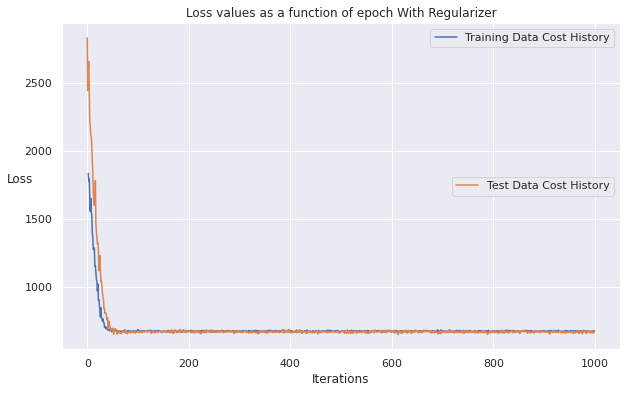

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel("Loss", rotation=0)
ax.set_xlabel("Iterations")
plt.title(label="Loss values as a function of epoch With Regularizer")

ctrain,=plt.plot(range(n_iter), -cost_history_wR, label="Training Data Cost History")
ctest,=plt.plot(range(n_iter), -test_cost_history_wR, label="Test Data Cost History")

l1 = ax.legend(handles=[ctrain], loc='upper right')
l2 = ax.legend(handles=[ctest], loc='center right')

ax.add_artist(l1)

plt.show()

##### 3.6.C Is the model with regualization underfitting?


The accuracy of the model with regularizer is higher for the test data and the training data, hence it is underfitting.

### 3.7 Compare the performance of these two models with a corresponding model fit using scikit-learn.

In [ ]:
#Using scikit-learn to create a regression model
LR_scikit=LogisticRegression(random_state=7).fit(X_train, y_train) 

#Adding the accuracy of the model generated to the dataframe with all the accuracies
acc_df.loc[4]=("Logistic model using scikit-learn", LR_scikit.score(X_test, y_test)*100)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
acc_df

,Model,Accuracy
0,Without regularization (train data),45.380711
1,Without regularization (test data),45.192308
2,With regularization (train data),45.685279
3,With regularization (test data),48.076923
4,Logistic model using scikit-learn,46.153846


In [ ]:
if acc_df['Accuracy'][1]>acc_df['Accuracy'][3] and acc_df['Accuracy'][1]>acc_df['Accuracy'][4]:
  print("From the above table, we can observe that the logistic model generated without regularization performs the best on test data.")
elif acc_df['Accuracy'][3]>acc_df['Accuracy'][1] and acc_df['Accuracy'][3]>acc_df['Accuracy'][4]:
  print("From the above table, we can observe that the logistic model generated with regularization performs the best on test data.")
elif acc_df['Accuracy'][4]>acc_df['Accuracy'][1] and acc_df['Accuracy'][4]>acc_df['Accuracy'][3]:
  print("From the above table, we can observe that the logistic model generated using scikit-learn performs the best on test data.")
  
#Since the models may not perform the same every single time, we used a few if conditions to determine which model performs the best on test data.

From the above table, we can observe that the logistic model generated with regularization performs the best on test data.


### 3.8 How do the various parameters (learning rate, regularization coefficient) influence our results?

In [ ]:
pdf=pd.DataFrame(columns=['Learning Rate','Regularizer','Accuracy on Test Data'])

In [ ]:
#abs
ind=0 #Variable to keep track of index
for lr in [0.001, 0.002, 0.003, 0.005, 0.01]:

  #When regularizer is absent
  n_iter = 1000
  theta = np.random.randn(7, 1)
  X_b = np.c_[np.ones((len(X_train),1)),X_train]
  y_b = np.array(y_train)
  X_t = np.c_[np.ones((len(X_test),1)),X_test]
  y_t = np.array(y_test)
  theta_l,cost_history, test_cost_history = stocashtic_gradient_descent(X_b, y_b, X_t, y_t, theta,lr,n_iter,None,0)
  X_t = np.c_[np.ones((len(X_test),1)),X_test]
  true_label = np.array(y_test)
  predict = np.dot(X_t,theta_l)
  predicted_label = np.where(predict >=0.5, 1, 0)
  pdf.loc[ind]=(lr, 'No', accuracy_calc(predicted_label, true_label)*100)
  ind=ind+1

  #When regularizer is present
  n_iter = 1000
  theta = np.random.randn(7, 1)
  X_b = np.c_[np.ones((len(X_test),1)),X_test]
  y_b = np.array(y_test)
  X_t = np.c_[np.ones((len(X_test),1)),X_test]
  y_t = np.array(y_test)
  theta_l,cost_history, test_cost_history = stocashtic_gradient_descent(X_b,y_b,X_t, y_t, theta,lr,n_iter,'l2',0.001)
  X_t = np.c_[np.ones((len(X_test),1)),X_test]
  true_label = np.array(y_test)
  predict = np.dot(X_t,theta_l)
  predicted_label = np.where(predict >=0.5, 1, 0)
  pdf.loc[ind]=(lr, 'Yes', accuracy_calc(predicted_label, true_label)*100)
  ind=ind+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [ ]:
pdf #Displaying the dataframe with values of Learning Rate,Regularizer(Yes or No) and corresponding Accuracy on Test Data

,Learning Rate,Regularizer,Accuracy on Test Data
0,0.001,No,47.115385
1,0.001,Yes,62.500000
2,0.002,No,46.153846
3,0.002,Yes,48.076923
4,0.003,No,41.346154
5,0.003,Yes,57.692308
6,0.005,No,45.192308
7,0.005,Yes,53.846154
8,0.010,No,41.346154
9,0.010,Yes,56.730769


[Text(0.5, 1.0, 'Impact of Regularizer and Learning Rate on Accuracy')]

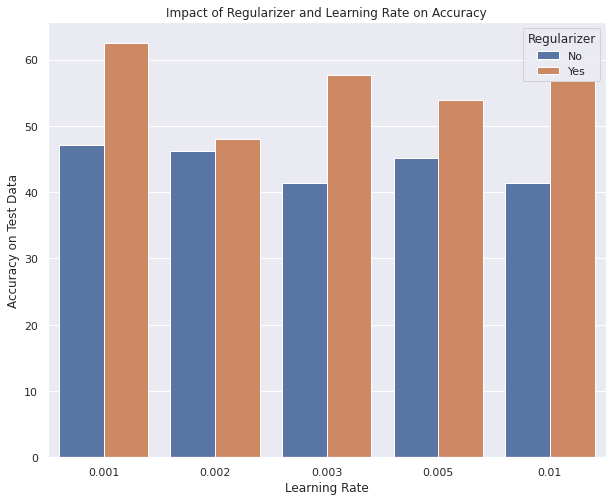

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="Learning Rate", y="Accuracy on Test Data", hue="Regularizer", data=pdf).set(title='Impact of Regularizer and Learning Rate on Accuracy', )


In [ ]:
max_acc=int(pdf['Accuracy on Test Data'].idxmax())
print("The best learning rate for higher accuracy seems to be",pdf.iloc[max_acc]['Learning Rate'])
print("Having a regularization coefficient improves the result for all learning rates.")

The best learning rate for higher accuracy seems to be 0.001
Having a regularization coefficient improves the result for all learning rates.


The best learning rates for higher accuracy seem to be 0.001 and 0.002. Having a regularization coefficient improves the result for all learning rates.

### 3.9. Implement a python function that takes the predicted labels and the true label arrays, and computes the F-score.

In [ ]:
def f1_score(p,t):
    return (confusion_matrix(p,t)[0][0])/(confusion_matrix(p,t)[0][0] + (1/2)*((confusion_matrix(p,t)[1][0])+(confusion_matrix(p,t)[1][1])))

In [ ]:
print(f1_score(predicted_label,true_label))

0.7019867549668874


### 3.10 Now you will run logistic regression (without regularization, and using our SGD procedure) five times with only one input features Lagj (j=1,...,5) for each time. Compute the confusion matrix, F score (using our implementations) and the accuracy on both training and test data given each of the learned models.

In [ ]:
perf_df=pd.DataFrame(columns=['Accuracy (Train)','F-Score (Train)','Confusion Matrix (Train)',
                              'Accuracy (Test)','F-Score (Test)','Confusion Matrix (Test)'])

In [ ]:
for col in range(5):
 
    lr = 0.0001
    n_iter = 1000
    
    theta = np.random.randn(2,1)
    train_col=X_train.iloc[:,col]
    X_b = np.c_[np.ones((len(train_col),1)),train_col]
    y_b = np.array(y_train)
    test_col = X_test.iloc[:,col]
    X_t = np.c_[np.ones((len(test_col),1)),test_col]
    y_t = np.array(y_test)

    theta_l, cost_history, test_cost_history = stocashtic_gradient_descent(X_b,y_b, X_t, y_t,theta,lr,n_iter,None,0)

    true_label_train = np.array(y_train)
    predict_train = np.dot(X_b,theta_l)
    predicted_label_train = np.where(predict_train >=0.5, 1, 0)

    true_label_test = np.array(y_test)
    predict_test = np.dot(X_t,theta_l)
    predicted_label_test = np.where(predict_test >=0.5, 1, 0)


    perf_df.loc[col]=(accuracy_calc(predicted_label_train, true_label_train)*100, f1_score(predicted_label_train, true_label_train), confusion_matrix(predicted_label_train, true_label_train), 
                      accuracy_calc(predicted_label_test, true_label_test)*100, f1_score(predicted_label_test,true_label_test), confusion_matrix(predicted_label_test,true_label_test))

In [ ]:
perf_df=perf_df.rename(index={0:'Lag1',	1:'Lag2',	2:'Lag3',	3:'Lag4',	4:'Lag5'})

In [ ]:
perf_df

,Accuracy (Train),F-Score (Train),Confusion Matrix (Train),Accuracy (Test),F-Score (Test),Confusion Matrix (Test)
Lag1,44.974619,0.010949,"[[3, 440], [1, 541]]",41.346154,0.000000,"[[0, 43], [0, 61]]"
Lag2,44.771574,0.003663,"[[1, 440], [1, 543]]",42.307692,0.032258,"[[1, 43], [0, 60]]"
Lag3,44.771574,0.000000,"[[0, 441], [0, 544]]",41.346154,0.000000,"[[0, 43], [0, 61]]"
Lag4,44.771574,0.000000,"[[0, 441], [0, 544]]",41.346154,0.000000,"[[0, 43], [0, 61]]"
Lag5,44.771574,0.000000,"[[0, 441], [0, 544]]",41.346154,0.000000,"[[0, 43], [0, 61]]"


#### 3.10.A Which are the best models among the five models here and the earlier models in part 5, in terms of the accuracy and F-score, respectively?


In [ ]:
id_acc_max_test=perf_df['Accuracy (Test)'].idxmax()
id_f_max_test=perf_df['F-Score (Test)'].idxmax()

print("The model which has the highest Accuracy on the test data is for", id_acc_max_test)
print("The model which has the highest F-Score on the test data is for", id_f_max_test)

The model which has the highest Accuracy on the test data is for Lag2
The model which has the highest F-Score on the test data is for Lag2


#### 3.10.B Does the best model also achieve the best accuracy or F-score on the training data? (Hint: The best model must be chosen based on the test data, not the training data!)

In [ ]:
id_acc_max_train=perf_df['Accuracy (Train)'].idxmax()
id_f_max_train=perf_df['F-Score (Train)'].idxmax()

if(id_acc_max_train==id_acc_max_test):
  print("Yes, the the best model", id_acc_max_test, "also achieves the best accuracy on the training data.")
else:
  print("No, the the best model", id_acc_max_test, "does not achieve the best accuracy on the training data.")

if(id_f_max_train==id_f_max_test):
  print("Yes, the the best model", id_f_max_test, "also achieves the best F-score on the training data.")
else:
  print("No, the the best model", id_f_max_test, "does not achieve the best F-score on the training data.")


No, the the best model Lag2 does not achieve the best accuracy on the training data.
No, the the best model Lag2 does not achieve the best F-score on the training data.


## 4. ROC Curves


#### 4.1. Write a python function that takes the predicted labels and the true label arrays, and computes the ROC curve as well as the area under the ROC curve/Area Under Curve(AUC).

In [ ]:
# Impotrting libraries 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
# Calculating TPR and FPR 
def perf_metrics(true_label, predicted_label,threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(predicted_label)): 
        if(predicted_label[i] >= threshold):
            if(true_label[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(predicted_label[i] < threshold):
            if(true_label[i] == 0):
                tn += 1
            else:
                fn += 1
    
    #We find the True positive rate and False positive rate based on the threshold
            
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]

In [ ]:
#Now we calculate FPR and TPR for different thresholds and get AUC and ROC
thresholds = [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]

In [ ]:
# Function to calculate ROC 
def Calculate_ROC(X_t,y_test,theta_l):
    roc_points_new = []
    for threshold in thresholds:
        true_label = np.array(y_test)
        predict = np.dot(X_t,theta_l)
        predicted_label = np.where(predict >=threshold, 1, 0)
        rates = perf_metrics(true_label,predicted_label,threshold)
        roc_points_new.append(rates)      
    return roc_points_new


### 4.2 Use the above function and matplotlib to draw ROC curves for the models from Question 3 with varying thresholds. Determine the best model in terms of the AUC. 

In [ ]:
# Return the value of AUC  :
fpr_array = []
tpr_array = []
for i in range(len(Calculate_ROC(X_t,y_test,theta_l))-1):
    point1 = Calculate_ROC(X_t,y_test,theta_l)[i];
    point2 = Calculate_ROC(X_t,y_test,theta_l)[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])
    auc = sum(np.trapz(tpr_array,fpr_array))+1
    #print('Area under curve={}'.format(auc))
    

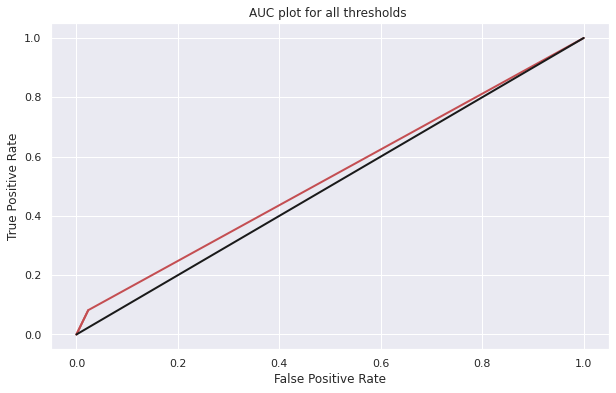

In [ ]:
# PLotting ROC and AUC :
plt.figure(figsize=(10,6))
plt.plot(tpr_array,fpr_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC plot for all thresholds ')
plt.show()

### 4.3 Repeat step 2 with the reference implementation from scikit-learn.

In [ ]:
# ROC value using Scikit Learn package 
def generate_roc_package(X_t,y_test,theta_l):
    roc_points_package = []
    for threshold in thresholds:
        true_label = np.array(y_test)
        predict = np.dot(X_t,theta_l)
        predicted_label = np.where(predict >=threshold, 1, 0)
        fpr, tpr,thres = roc_curve(true_label,predicted_label)
        rates = [fpr[1].tolist(),tpr[1].tolist()]
        roc_points_package.append(rates)
    return roc_points_package

In [ ]:
roc_points_package = []
true_label = np.array(y_test)
predict = np.dot(X_t,theta_l)
predicted_label = np.where(predict >=0.0, 1, 0)
fpr, tpr,thres = roc_curve(true_label,predicted_label)
rates = [fpr[1].tolist(),tpr[1].tolist()]
roc_points_package.append(rates)

In [ ]:
fpr_array = []
tpr_array = []
for i in range(len(generate_roc_package(X_t,y_test,theta_l))-1):
    point1 = generate_roc_package(X_t,y_test,theta_l)[i];
    point2 = generate_roc_package(X_t,y_test,theta_l)[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])

In [ ]:
# AUC valuie with scikit learn 
auc = sum(np.trapz(tpr_array,fpr_array))+1
print('Area under curve={}'.format(auc))


Area under curve=1.3900114372855508


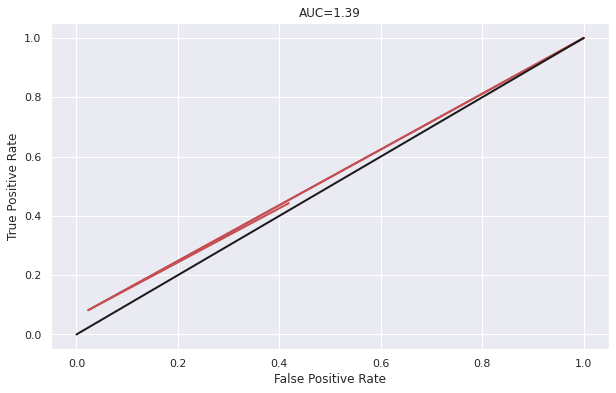

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(tpr_array,fpr_array, 'r', lw=2)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC={}'.format(round(auc,3)))
plt.show()

### 4.4 Fit suitable k-nn and decision tree models (using your implementations from Assignment 1) to the Weekly dataset in Question 2, and compare them with the best logistic regression model obtained in part 2. Report the confusion matrices, accuracies, AUCs and the ROC curves (on the same plot) and comment on which model is the better one among the three types.

In [ ]:
# Decision Tree # Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions

In [ ]:
dataset = pd.DataFrame(df.loc[:,['Year','Lag1','Lag2','Direction_n']])
dataset.head()

,Year,Lag1,Lag2,Direction_n
0,1990,0.816,1.572,0
1,1990,-0.270,0.816,0
2,1990,-2.576,-0.270,1
3,1990,3.514,-2.576,1
4,1990,0.712,3.514,1


In [ ]:
X = dataset.drop('Direction_n', axis=1)
y = dataset.loc[:,['Year','Direction_n']]

In [ ]:
X_train = X[X['Year']<2009]
X_train = X_train.drop('Year',axis=1)
X_train = np.asarray(X_train)

In [ ]:
X_test = X[X['Year']>2008]
X_test = X_test.drop('Year',axis=1)
X_test = np.asarray(X_test)

In [ ]:
y_train = y[y['Year']<2009]
y_train = y_train.drop('Year',axis=1)
#y_train = np.asarray(y_train)

In [ ]:
y_test = y[y['Year']>2008]
y_test = y_test.drop('Year',axis=1)
#y_test = np.asarray(y_test)

In [ ]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, y_train,X_test,y_test):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    prob = clf_gini.predict_proba(X_test)
    return clf_gini,prob

# Function to perform training with entropy.
def train_using_entropy(X_train, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def predict(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    # print("Predicted values:")
    # print(y_pred)
    return y_pred

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)

In [ ]:
def get_metrics(y_test, y_pred):
      
    print("Confusion Matrix:\n",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : \n",
    classification_report(y_test, y_pred))
    

In [ ]:
clf_gini,prob = train_using_gini(X_train, y_train,X_test,X_train)

y_pred_gini = predict(X_test, clf_gini)
y_pred_prob = prob

In [ ]:
clf_gini,prob = train_using_gini(X_train, y_train,X_test,X_train)

y_pred_gini = predict(X_test, clf_gini)
y_pred_prob = prob

In [ ]:
new_y_test = []
for i in np.asarray(y_test) : 
    new_y_test.append(i[0])

In [ ]:
np.array(new_y_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
#using gini predicted values
accuracy_calc(y_pred_gini,np.array(new_y_test))

0.5480769230769231

In [ ]:
roc_curve(np.array(new_y_test),y_pred_gini)

(array([0.        , 0.39534884, 1.        ]),
 array([0.        , 0.50819672, 1.        ]),
 array([2, 1, 0]))

In [ ]:
def get_all_metrics(new_y_test,prob,y_pred_gini) : 
    print('ROC Score :',roc_auc_score(new_y_test, prob[:,1]),'\n')
    print('Confusion Matrix',confusion_matrix(y_pred_gini,np.array(new_y_test)),'\n')
    print('Accuracy :',accuracy_calc(y_pred_gini,np.array(new_y_test)))

In [ ]:
#ROC value with KNN 
get_all_metrics(new_y_test,prob,y_pred_gini)